# Header

<img src="http://reiner-lemoine-institut.de//wp-content/uploads/2015/09/rlilogo.png" width="100" style="float: right">

__copyright__ 	= "© Reiner Lemoine Institut" <br>
__license__ 	= "GNU Affero General Public License Version 3 (AGPL-3.0)" <br>
__url__ 		= "https://www.gnu.org/licenses/agpl-3.0.en.html" <br>
__author__ 		= "Ludwig Hülk" <br>

# Import

In [1]:
import sys
import os
import getpass
import pandas as pd
import numpy as np
from sqlalchemy import *
# plot
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.graph_objs as go
import plotly.offline as pltly
import colorlover as cl
import seaborn as sns
# notebook
from IPython.display import Image
from IPython.core.display import HTML 

pltly.init_notebook_mode(connected=True)
%matplotlib inline

version = 'v0.1.3 (jupyther)'
project = 'REEEM'

# Database Connection

This function creates a database connection to the **reeem_db**.<br>
The default user is **reeem_vis**, a user that has only read rights.

In [2]:
def reeem_session():
    """SQLAlchemy session object with valid connection to reeem database"""
    
    print('Please provide connection parameters to database:\n' +
              'Hit [Enter] to take defaults')
    host = '130.226.55.43' # input('host (default 130.226.55.43): ')
    port = '5432' # input('port (default 5432): ')
    database = 'reeem' # input("database name (default 'reeem'): ")
    user = 'reeem_vis' # input('user (default postgres): ')
    # password = input('password: ')
    password = getpass.getpass(prompt='password: ',
                                   stream=sys.stderr)
    con = create_engine(
            'postgresql://' + '%s:%s@%s:%s/%s' % (user,
                                                  password,
                                                  host,
                                                  port,
                                                  database)).connect()
    print('Password correct! Database connection established.')
    return con

# Access Data

This section establishes the database connection and asks for the **password**.<br>
The username can be changed in the corresponding function in the section **Database Connection** above.<br>
If you don't have a username or forgot your password please contact your database admins.

In [3]:
con = reeem_session()

C:\Anaconda3\envs\reeem-vis\lib\site-packages\ipykernel_launcher.py:12: UserWarning:

The `stream` parameter of `getpass.getpass` will have no effect when using ipykernel



Please provide connection parameters to database:
Hit [Enter] to take defaults
password: ········
Password correct! Database connection established.


# View 0.1: Existing entries in one column
## Database Query

This section can be used to query one specific database **column** from one database table (**FROM**).<br>
The result is saved to a pandas.DataFrame (**df_0**) and printed.

In [4]:
# Database select (SQL)
column = 'pathway' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  {0} 
    FROM    model_draft.reeem_times_paneu_output 
    GROUP BY {0} 
    ORDER BY {0}; """.format(column))
df_0 = pd.read_sql_query(sql, con)
print(df_0)

                pathway
0                  Base
1  Base(withRen.Target)
2               HighRES
3                 Pilot
4                Pilot2
5          StorageInnov


# View 0.2: Search for existing indicators
## Database Query

This section can be used to search for one specific **indicator** and its **nid** in one database table.<br>
The documentation of the **LIKE** expression is [here](https://www.postgresql.org/docs/current/static/functions-matching.html#FUNCTIONS-LIKE). 
The result is printed.<br>
Hint: If one indicator has multiple nid it is a bug!

In [5]:
# Database select (SQL)
sql = text("""
    SELECT  pathway, version, nid, category, indicator
    FROM    model_draft.reeem_times_paneu_output 
    WHERE   category LIKE 'Emissions%' 
            AND indicator = 'CO2' 
    GROUP BY pathway, version, nid, category , indicator
    ORDER BY nid, category , indicator; """)
df_0 = pd.read_sql_query(sql, con)
print(df_0)

                pathway version  nid                              category  \
0          StorageInnov  DataV1  867  Emissions by Emittant and Sector_CO2   
1  Base(withRen.Target)  DataV1  867  Emissions by Emittant and Sector_CO2   
2                 Pilot  DataV1  867  Emissions by Emittant and Sector_CO2   
3                Pilot2  DataV1  867  Emissions by Emittant and Sector_CO2   
4                  Base  DataV1  867  Emissions by Emittant and Sector_CO2   
5               HighRES  DataV1  867  Emissions by Emittant and Sector_CO2   
6                  Base  DataV2  867  Emissions by Emittant and Sector_CO2   
7                  Base  DataV2  933  Emissions by Emittant and Sector_CO2   

  indicator  
0       CO2  
1       CO2  
2       CO2  
3       CO2  
4       CO2  
5       CO2  
6       CO2  
7       CO2  


# View 0.3: Table metadata
## Database Query

This section can be used to get the metadata from one database table.<br>
The result is printed.<br>

In [6]:
# Database select (SQL)
sql = text("""SELECT obj_description('model_draft.reeem_times_paneu_output'::regclass);""")
df_meta = pd.read_sql_query(sql, con).loc[:,'obj_description']
df_meta

0    {"title": "REEEM Times PanEU Output",\n    "de...
Name: obj_description, dtype: object

# View 1: One indicator for one region in one pathway over time
## Database Query

This section can be used to query one specific **indicator** (_filter 1_) for one specific **region** (_filter 2_) from one database table (_table_).<br>
Indicators are identified by the **nid**.<br>
It is possible to select one specific **pathway** (_filter 3_) and one specific data **version** (_filter 4_).<br>
To querry additional coulmns from the database table add the names to the **SELECT** statement (_column_).<br>
The sortation is done by the **ORDER BY** (_sorting_).<br>
The result from the database is saved to a pandas.DataFrame (**df_1**) and can be printed.

In [7]:
# Database select (SQL)
sql = text("""
    SELECT  pathway, version, region, year, indicator, category, value, unit  -- column
    FROM    model_draft.reeem_times_paneu_output  -- table
    WHERE nid = 867                               -- filter 1
        AND region = 'EU28'                       -- filter 2
        AND pathway = 'Base'                      -- filter 3
        AND version = 'DataV1'                    -- filter 4
    ORDER BY pathway, version, year;              -- sorting """)
df_1 = pd.read_sql_query(sql, con)
# print(df_1)

## Metadata

The important information from the above select (**df_1**) is collected in a Dictionary (**info_dict_1**).

In [9]:
# Facts dict
info_dict_1 = {}
info_dict_1['Filename'] = ['{}_reeem_plot_1' .format(pd.to_datetime('today').strftime("%Y-%m-%d"))]
info_dict_1['Category'] = df_1.loc[:,'category'].unique()
info_dict_1['Indicator'] = df_1.loc[:,'indicator'].unique()
info_dict_1['Unit'] = df_1.loc[:,'unit'].unique()
info_dict_1['Pathway'] = df_1.loc[:,'pathway'].unique()
info_dict_1['Year'] = df_1.loc[:,'year'].unique().tolist()
info_dict_1['Region'] = df_1.loc[:,'region'].unique()
info_dict_1['Y-Axis'] = ['{} in {}'.format(*info_dict_1['Indicator'], *info_dict_1['Unit'])]
info_dict_1['Title'] = ['{} in {}'.format(*info_dict_1['Category'], *info_dict_1['Region'])]
info_dict_1['Metadata'] = df_meta

# Print facts
for x in info_dict_1:
    print(x,':',info_dict_1[x])

Filename : ['2018-05-07_reeem_plot_1']
Category : ['Emissions by Emittant and Sector_CO2']
Indicator : ['CO2']
Unit : ['Mt']
Pathway : ['Base']
Year : [2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050]
Region : ['EU28']
Y-Axis : ['CO2 in Mt']
Title : ['Emissions by Emittant and Sector_CO2 in EU28']
Metadata : 0    {"title": "REEEM Times PanEU Output",\n    "de...
Name: obj_description, dtype: object


## Plot

This is a basic plot with [matplotlib](https://matplotlib.org/).<br>
The title and y-axis labels are taken from the **info_dict_1**. They can be exchanged with manual text.

(0, 3608.7828)

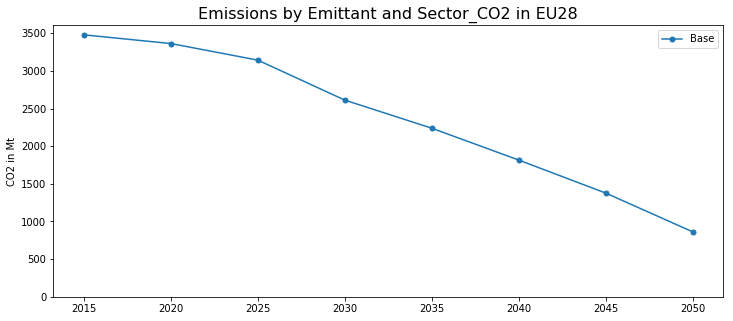

In [10]:
# Plot for one indicator and one pathway
fig = plt.figure(figsize=(12, 5))
ax = plt.subplot()
# plt.title(r'CO2-Emissions in EU28', fontsize=16)  # Manual title
plt.title(*info_dict_1['Title'], fontsize=16)         # Title from info
# plt.ylabel(r'CO2-Emissions in Mt')                # Manual label
plt.ylabel(*info_dict_1['Y-Axis'])                    # Label from info
plt.plot(df_1.loc[:,'year'], df_1.loc[:,'value'], 
         marker="o",  markersize=5)
plt.legend(df_1.loc[:,'pathway'].unique())
ax.set_ylim(ymin=0)

## Interactive Plot

This is a basic interactive plot with [Plotly](https://plot.ly/python/).<br>
You can hover over the elements of the plot and observe the data.

In [12]:
# Interactive plot for one indicator and one pathway
data = [go.Scatter(
    x = df_1.loc[:,'year'],
    y = df_1.loc[:,'value'],
    name = df_1.loc[:,'pathway'].unique())]

# Set layout
layout = go.Layout(
    height=400, width = 800,
    #title='CO2-Emissions in EU28',
    title=''.join(info_dict_1['Title']),
    # yaxis=dict(title='CO2-Emissions in Mt') )
    yaxis=dict(title=''.join(info_dict_1['Y-Axis'])) )
ifig = go.Figure(data=data, layout=layout)
pltly.iplot(ifig)

## Save results to files

The results are saved to cooresponding files in a folder named **data**.<br>
The **info_dict** is saved to a text file (txt).<br>
The **data** is saved to a table (csv).<br>
The **plot** is saved as an image (png).<br>
The **interactive plot** is saved as a webpage (html). It will also open in a new tab of your browser.

In [13]:
# Write facts to textfile
txtname = ('data/{}.txt').format(*info_dict_1['Filename'])
with open(txtname,'w') as tfile:
    for i in info_dict_1.keys():
        tfile.write(i + ": " + ', '.join([str(x) for x in info_dict_1[i]]) + "\n")
tfile.close()
print("Facts saved to file:", txtname)

# Save data to CSV
csvname = 'data/{}.csv' .format(*info_dict_1['Filename'])
df_1.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)

# Save plot as file
plotname = 'data/{}.png' .format(*info_dict_1['Filename'])
fig.savefig(plotname, bbox_inches='tight')
print("Plot saved to file:", plotname)

# Save interactive plot
htmlname = 'data/{}.html' .format(*info_dict_1['Filename'])
pltly.plot(ifig, filename=htmlname)
print("Interactive plot saved to file:", htmlname)

Facts saved to file: data/2018-05-07_reeem_plot_1.txt
Data saved to file: data/2018-05-07_reeem_plot_1.csv
Plot saved to file: data/2018-05-07_reeem_plot_1.png
Interactive plot saved to file: data/2018-05-07_reeem_plot_1.html
